In [9]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
import pandas as pd
#Import standardised data as a pandas Dataframe
df = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0.xlsx")

X_std = df.values

#print(X_std.shape)
#print(X_std)

df_y = pd.read_excel("Z:\\Documents\\Python\\_df\\APPETIT\\df_std_CL0_20.xlsx")

y = np.ravel(df_y.values)
#print(y.shape)
#print(y)

estimators_classif = [
    #linear estimators
    ['Ridge', {'alpha': np.logspace(-5, +5, 11)}, RidgeClassifier(class_weight='balanced', random_state=0)],
    ['LogisticRegression',{'C': np.logspace(-5, +5, 11), 'max_iter':[200,300,400,500]},LogisticRegression(class_weight='balanced', random_state=0)],
    #non-linear estimators
    #['DecisionTree', {'max_depth': [3,5,10,None]}, DecisionTreeClassifier(class_weight='balanced', random_state=0)],
    #['ExtraTrees', {'n_estimators':[30,60,100,200,300],'max_depth': [3,5,10,None]}, ExtraTreesClassifier(random_state=0,class_weight='balanced')],
    ['RandomForest', {'n_estimators':[200,400,600], 'max_depth': [3,5,10,None]}, RandomForestClassifier(random_state=0,class_weight='balanced')],
    ['kNN', {'n_neighbors': np.arange(3,22,2)}, KNeighborsClassifier()],
]

df_NCV_scores = pd.DataFrame()

inner_cv = KFold(n_splits = 4, shuffle=True, random_state=0)
outer_cv = KFold(n_splits = 4, shuffle=True, random_state=1)

#Nested CV with parameter optimization

best_score = 0
selected_model = None
score_VP = {}

for est in estimators_classif:
    clf = GridSearchCV(estimator=est[2], param_grid=est[1], cv=inner_cv)
    clf.fit(X_std, y)
    print(clf.best_estimator_)
    print(clf.best_score_)
    
    #Extraction for violin plot
    score_VP[est[0]]=cross_val_score(clf.best_estimator_, X=X_std, y=y, cv=inner_cv)
    
    #df_NCV_scores = pd.concat([df_NCV_scores,pd.DataFrame(clf.cv_results_['mean_test_score'],columns=[est[0]])], axis = 1)
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        selected_model = clf.best_estimator_
        
nested_scores = cross_val_score(selected_model, X=X_std, y=y, cv=outer_cv)
nested_scores = nested_scores.mean()
print(score_VP)
#print (df_NCV_scores)

print(selected_model)

print(nested_scores)

RidgeClassifier(alpha=10.0, class_weight='balanced', random_state=0)
0.7984321305841924
LogisticRegression(C=10.0, class_weight='balanced', max_iter=200,
                   random_state=0)
0.7984321305841924
RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=600,
                       random_state=0)
0.8138960481099656
KNeighborsClassifier(n_neighbors=9)
0.7907001718213058
{'Ridge': array([0.79381443, 0.81443299, 0.79381443, 0.79166667]), 'LogisticRegression': array([0.79381443, 0.8556701 , 0.75257732, 0.79166667]), 'RandomForest': array([0.79381443, 0.86597938, 0.80412371, 0.79166667]), 'kNN': array([0.79381443, 0.8556701 , 0.72164948, 0.79166667])}
RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=600,
                       random_state=0)
0.7933580326460481


      Ridge  LogisticRegression  RandomForest       kNN
0  0.793814            0.793814      0.793814  0.793814
1  0.814433            0.855670      0.865979  0.855670
2  0.793814            0.752577      0.804124  0.721649
3  0.791667            0.791667      0.791667  0.791667


<AxesSubplot:>

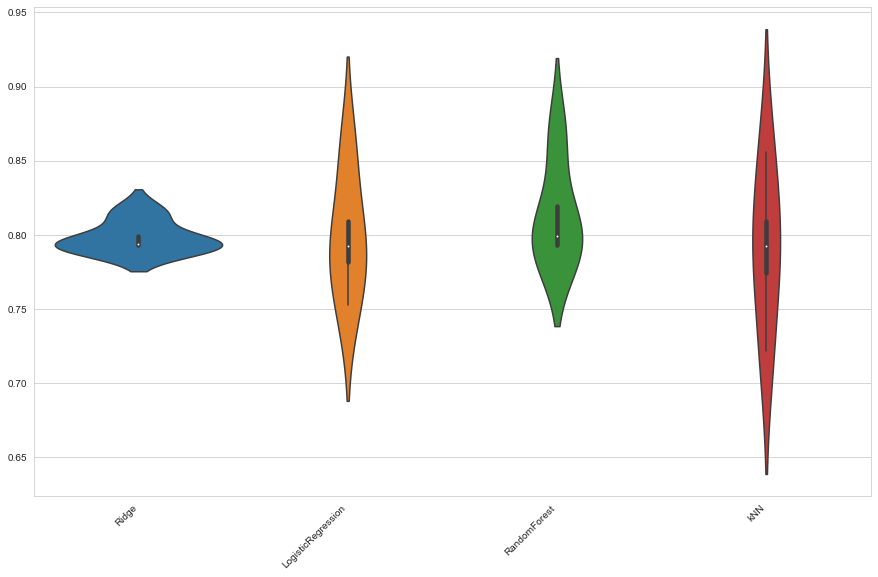

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_dataVP = pd.DataFrame.from_dict(score_VP)
print(df_dataVP)
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(15, 9))
_ = plt.xticks(rotation=45, ha='right')

sns.violinplot(data = df_dataVP)